## First - Some Linear Algebra
### Matrix
A Matrix is essentially a table where numbers are arranged in rows and columns, with a set of agreed upon rules where it comes to math operations

for example:

A = $ \begin{bmatrix} 1 & 2 & 3 \\
                     4 & 5 & 6 \\
                     7 & 8 & 9 
      \end{bmatrix} $

we number of rows and columns in a matrix its dimensions - in our example it is a 3x3 matrix 
since number of rows and columns is the same we would also call it a "square" matrix.

Here's a non-square matrix:
A = $ \begin{bmatrix} 1 & 2 \\
                     3 & 4 \\
                     5 & 6  
      \end{bmatrix} $

### Vector
A vector is a special case of a matrix that has either only one row or one column

V_col = $\begin{bmatrix} 1\\2\\3\end{bmatrix} $

V_row = $\begin{bmatrix} 1&2&3\end{bmatrix} $


### Arithmetic
Basic rules of arithmetic when it comes to matrices and vectors (here, I will use M for matrices and V for vectors):
#### 1. Addition: 
 $M_1 + M_2 = M_1(i,j)+M_2(i,j)$

eg. $\begin{bmatrix} 1&2\\3&4 \end{bmatrix} + \begin{bmatrix} 1&0\\1&0\end{bmatrix} = \begin{bmatrix} 2&2\\4&4\end{bmatrix} $

#### 2. Multiplication
2.1 Matrix x Matrix:

 $M1_{(i\times k)} \times M2_{(k\times j)} = M3_{(i\times j)}$
 
 first notice the dimensions - the resulting matrix has the same amount of rows as the first, and same amount of columns as the second
 
 that is because $M3[i,j] = \Sigma_{i,j} (M1[i,k]\cdot M2[k,j]) $
 
 it is important to notice, that in matrix operations $A\times B \ne B\times A$ !!!
 
 it is very easy to see from our previous example:
 
 $M2_{(k\times i)} \times M1_{(j\times k)} \ne M3_{(i\times j)}$
 
 in fact - unless $k=i=j$, this operation is undefined !
 
 because of this we always specify if we multiply from the left or from the right

### A small demo:
<video controls width=800 height=600 src='matrix_mul.mp4' />

### Identity Matrix
This special matrix has few properties we have to remember:

#### 1. Identity matrix is a square matrix (i = j) with ones along the diagonal and zeroes everywhere else
$\begin{bmatrix}  1 & 0 & 0 & \dots & 0\\
                  0 & 1 & 0 & \dots & 0\\ 
                  0 & 0 & 1  & \dots & 0 \\
                  & &  \vdots & & \\
              0 & 0 & \dots & 0 & 1 
              \end{bmatrix} $

#### 2. Identity matrix acts like number 1 for multiplication - anything multiplied by identity matrix doesn't change
$ 1\times8 = 8 \longrightarrow \begin{bmatrix}1&0\\0&1\end{bmatrix}\times \begin{bmatrix}8&8\\8&8\end{bmatrix} = \begin{bmatrix}8&8\\8&8\end{bmatrix}$


### Transpose & Invert

#### Matrix Transpose
This operation (marked as $M^T$ ) makes rows become columns and columns become rows

(formally each element $a_{i,j}$ of matrix $A$ becomes element $a_{j,i}$ of matrix $A^T$)

eg.

$\begin{bmatrix}1&2&3\\4&5&6\end{bmatrix}^T \rightarrow \begin{bmatrix}1&4\\2&5\\3&6 \end{bmatrix}$

#### Matrix Inverse
This operation (marked as $A^{-1}$ means finding a matrix B, that multiplied by matrix A creates an identity matrix $I$

To be invertible matrix needs to be square since it is necessary to have $A\times B=B\times A=I$

eg.
$\begin{bmatrix}1&2\\3&4\end{bmatrix}^{-1} = \begin{bmatrix} -2&1\\1.5& -0.5\end{bmatrix}$

let's check that it is the correct solution:


$\begin{bmatrix}1&2\\3&4\end{bmatrix} \times \begin{bmatrix} -2&1\\1.5& -0.5\end{bmatrix} = \begin{bmatrix} -2&1\\1.5& -0.5\end{bmatrix} \times \begin{bmatrix}1&2\\3&4\end{bmatrix} = \begin{bmatrix}1&0\\0&1\end{bmatrix} \equiv I$

## Polynomials in vector form
Polynomial looks like $p_n(x) = a_0x^0 + a_1x^1 + a_2x^2 + a_3x^3 + \dots + a_nx^n$

if we collect all the coefficients into a row vector $A=\begin{bmatrix}a_0&a_1&a_2&a_3&\dots&a_n\end{bmatrix} $

and collect all the variables into a column vector $X=\begin{bmatrix}x^0\\x^1\\x^2\\x^3\vdots \\x^n\end{bmatrix}$

then we can express the polynomial simply as $p(x)=AX$

# Now to our business :-)
regression problem is finding a set of coefficients that best describe the set of values we have observed.

Another way we might call it is "interpolation" - we turn a set of observations into a model that we can use to predict (or extrapolate) other values that we have not observed.

simplest and naive example would be - given two points $(x_1, y_1) , (x_2,y_2)$, find a set of coefficients a1, a2 that create a model to describe those points. 
we know where this is going:

a simple line equation: $y=mx+n$

$m=(y_2-y_1)/(x_2-x_1)$

$n=(y_1 + mx_1)$

or in a polynomial form:

$p_2(x)=a_0x^0+a_1x^1=(y_1 + mx_1)x^0 + mx^1$

thus our coefficients are $a_0=(y_1 + mx_1),   a_1=m$


however this is a very simplistic idea and the result is completely accurate for those two points. What if we have more than two points we want to incorporate ? 


### LS Solution
now to a more serious idea, let's say we want to find a line that describes 10 points $(x_1,y_1),(x_2,y_2),\dots,(x_{10},y_{10})$

A convenient way to accomplish this task is a "Least Squares" method. This method finds a solution which minimizes the square error between predicted and observed data points.
In our case - that would be finding a line such that sum of the distances from the line to each of the measured points would be minimal.

Formally: 

Let c be the desired set of coefficients, $A$ would be our points' x values for each power of the polynomial, and $b$ would be the vector of our points' y values

$c = \begin{bmatrix}c_0&c_1&\dots&c_{10}\end{bmatrix} $

$A=\begin{bmatrix}1&x_1\\1&x_2\\ \vdots&\vdots\\1&x_{10}\end{bmatrix}$

$b=\begin{bmatrix}y_1\\y_2\\ \vdots \\y_{10}\end{bmatrix}$


#### Using those vectors we can formulate the least squares solution

$Ac=b$

what we would really like to do is find the inverse matrix of A and multiply the above equation from the left 

if that was possible, we would get $A^{-1}Ac=A^{-1}b \implies Ic=A^{-1}b \implies c = A^{-1}b$

however we have a problem - matrix A is not square, therefore is not invertible.

here is where the approximation comes into play - any matrix multiplied by itself transposed creates a square matrix ! This is something we can work with !

$A^{T}Ac=A^{T}b$

now we can talk about inverse of the result:

$(A^{T}A)^{-1}A^{T}Ac=(A^{T}A)^{-1}A^{T}b$

notice the magic: $ (A^{T}A)^{-1}(A^{T}A) \equiv I $ 

finally we get what we want:

$c=(A^{T}A)^{-1}A^{T}b$



# Geo location example
Let us look at a real example. Suppose we want to take a static picture of a map, but produce real world geographic coordinates from it. This would give us our own little navigation aid !

To make this work we would need a function that translates our image pixel coordinates (x,y) into a real world (Lattitude, Longitude) coordinates. 
Easy way to do so is with two polynomials $Lat = f(x,y), Lon = g(x,y)$

Then we could plug pixel location on the image, and get back the (Lat, Long) coordinates on a very real globe.

Let's see how we can make it work !

#### Two-variable polynomials look like this :

$p(x,y) = \Sigma_{i,j}{(x^i\cdot y^j \cdot a_i)} $

basically just a blender mix of coefficients and powers of x and y

therefore:

$ lat(x,y) = a_0x^0y^0+a_1x^0y^1+a_2x^1y^0+a_3x^1y^1+a_4x^2y^0+a_5x^0y^2$

$ lon(x,y) = b_0x^0y^0+b_1x^0y^1+b_2x^1y^0+b_3x^1y^1+b_4x^2y^0+b_5x^0y^2$

This means we need to find two sets of coefficients $(a_0, a_1, \dots, a_5) , (b_0, b_1, \dots, b_5)$ that would define those polynomials.

In [1]:
import numpy as np
from functools import reduce
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

#### it is helpful to normalize x and y coordinates to the size of the map - that way we are dealing with values between 0 and 1 always

In [2]:
mapw = 2560
maph = 1600
ax = []

#### These are all the measurements I've taken using google maps: 10 points (....to Gryffindor?)

In [3]:
x = np.array([67,2425,2159,247,1535, 1800, 1855,621.4467, 1129.3413,1645.9486]) /mapw
y = np.array([239,355, 1463, 1493, 494, 1462, 695,1098.2830, 948.50969,690.29365]) /maph
lat = np.array([40.725632, 40.723746, 40.705726, 40.705237, 40.721562, 40.705165, 40.718255, 40.711725, 40.714148,40.718364])
lon = np.array([-74.047152, -73.996545, -74.002259, -74.043282, -74.015641, -74.010026, -74.008836, -74.035251, -74.024368,-74.013257])


#### These are the powers of the polynomials

In [4]:
xpow = np.array([0,0,1,1,2,0])
ypow = np.array([0,1,0,1,0,2])

In [5]:
A = []
for val in list(zip(x,y)):
    A.append(list(map(lambda p: (val[0]**p[0])*(val[1]**p[1]) , zip(xpow,ypow))))
A = np.array(A)

### Now we've constructed the matrix A, it looks like this:
$\begin{bmatrix} x_0^0y_0^0 & x_0^0y_0^1 & x_0^1y_0^0 & x_0^1y_0^1 & x_0^2y_0^0 & x_0^0y_0^2\\
                x_1^0y_1^0 & x_1^0y_1^1 & x_1^1y_1^0 & x_1^1y_1^1 & x_1^2y_1^0 & x_1^0y_1^2\\
                x_2^0y_2^0 & x_2^0y_2^1 & x_2^1y_2^0 & x_2^1y_2^1 & x_2^2y_2^0 & x_2^0y_2^2\\
                &&&\vdots&&&\\
\end{bmatrix}$

#### Calculate the square approximation of A (remember the $A^TA$ trick)

In [6]:
sqA = (A.T).dot(A)

#### Finally the two last steps - find the inverse $({A^TA})^{-1}$ and calculate ${(A^TA)}^{-1}A^T$

In [7]:
invA = np.linalg.inv(sqA)
invAAt = invA.dot(A.T)

#### And we use this matrix to find the coefficients by multiplying the previous result with lattitude and longiture measurements (${(A^TA)}^{-1}A^T(lat)$ and ${(A^TA)}^{-1}A^T(lon)$)

In [8]:
lat_coeff = invAAt.dot(lat)
lon_coeff = invAAt.dot(lon)

### Here we make the polynomilas and combine them into one convenient function $location(x,y)$ :

In [9]:
lat_poly = lambda x,y: reduce(lambda acc,curr: acc+curr, map(lambda v: (x**v[0])*(y**v[1])*v[2] , zip(xpow,ypow,lat_coeff))) 
lon_poly = lambda x,y: reduce(lambda acc,curr: acc+curr, map(lambda v: (x**v[0])*(y**v[1])*v[2] , zip(xpow,ypow,lon_coeff))) 
location = lambda x,y: (lat_poly(x/mapw,y/maph), lon_poly(x/mapw,y/maph))

### Now that we've done that - let's figure out how accurate our solution is ! 
for that we will use the $R^2$ metric

this metric estimates "how well the solution describes the original points" 

and is intended to serve as a measure of the predictive power of the model 

$R^2 = \frac{SSR}{SST} $

where 

$SSR = \Sigma_{i}(f(x_i) - mean(y))^2$

$SST =  \Sigma_{i}(y - mean(y))^2$

In [10]:
def rsqr(res, true_res):
    mean_res = np.mean(true_res)
    vtot = np.sum([(i-mean_res)**2 for i in true_res])
    vres = np.sum([(i-mean_res)**2 for i in res])
    return vres/vtot



#### Let's use the function on our freshly created polynomials:

In [11]:
lat_res = lat_poly(x,y)
lon_res = lon_poly(x,y)
print("𝑅2 = ({}%,  {}%)".format(100*rsqr(lat_res, lat), 100*rsqr(lon_res, lon)))


𝑅2 = (99.97126252754398%,  99.99982070197322%)


#### If I didn't mess things up $\uparrow$ that looks pretty good 👍

In [12]:
#default: 
mapx,mapy = 1644.3012593467138, 690.4855512452914
if ax:
    inv = ax.transData.inverted()
    mapx,mapy = inv.transform(( ix, iy))
print(location(mapx,mapy))

(40.71833276965437, -74.01331626559286)


In [13]:
mapx,mapy


(1644.3012593467138, 690.4855512452914)

<IPython.core.display.Javascript object>


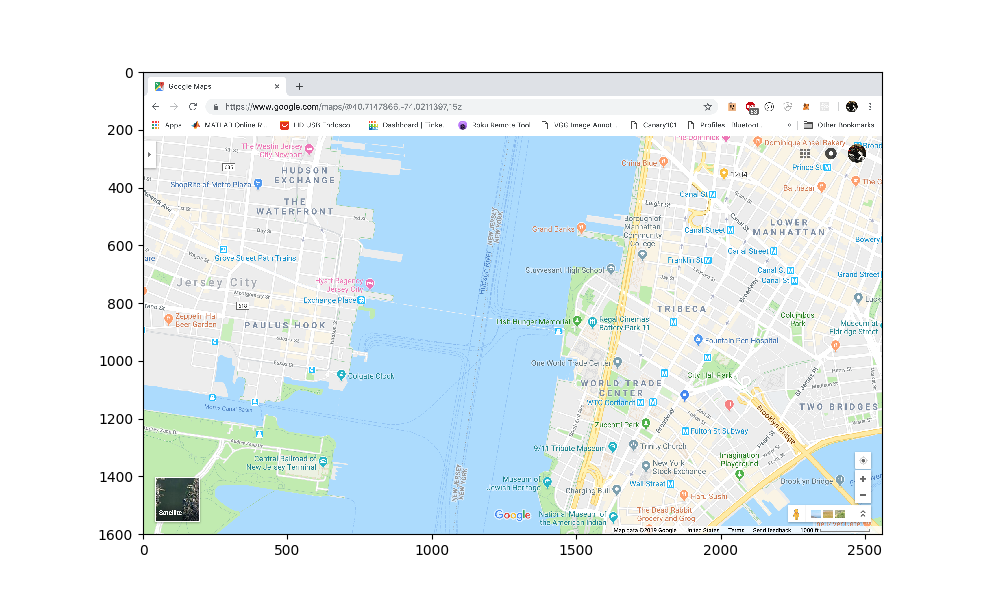

In [14]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]
mapimg = Image.open('map.png');
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(mapimg)

def onclick(event):
    global ix, iy
    ix, iy = event.x, event.y
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [15]:
#fig.canvas.mpl_disconnect(cid)